# Benchmarks

## Initialize

In [1]:
#library(Rmisc)
#library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
#library(data.table)
library("jsonlite")
library(ggthemes)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten


In [2]:
base_path = "/home/jakobs"

project_path = glue("{base_path}/data")
experiment = '231117'
experiment_path = glue("{project_path}/{experiment}")

endpoints_md = endpoint_defs = arrow::read_feather(glue("{base_path}/data/endpoints_epic_md.feather")) %>% filter(n_epic >=100)
endpoints = endpoint_defs$endpoint

In [3]:
library(data.table)
library(arrow)


Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [4]:
endpoint_selection = c(
    # generally very important
    "phecode_202", # Diabetes mellitus
    "phecode_401",	#Hypertension"  
    "phecode_404", # Ischemic heart disease   
    "phecode_404-1", # Myocardial infarction [Heart attack]
    "phecode_431-11", # Cerebral infarction [Ischemic stroke]
    "phecode_424", # Heart failure

    
   # "phecode_059-1", # COVID 19
    "phecode_468", # Pneumonia
    "phecode_474", # Chronic obstructive pulmonary disease [COPD]
      
    "phecode_286-2", #	Major depressive disorder
    "phecode_324-11", #Parkinson's Disease
    "phecode_328", # Dementias and cerebral degeneration

    
    "phecode_164", # Anemia
    "phecode_726-1", # Osteoporosis
    "phecode_371", # Cataract
    #"phecode_374-42", # Diabetic retinopathy
    #"phecode_374-5", # Macular degeneration
    #"phecode_375-1", # Glaucoma
    
    
    "phecode_103", # Malignant neoplasm of the skin
    "phecode_101", # Malignant neoplasm of the digestive organs
    "phecode_102", # LUNG CANCER
    
    "phecode_583", # Chronic kidney disease    
    "phecode_542", # Chronic liver disease and sequelae    
    "OMOP_4306655" # All-Cause Death
    
    # also generally important and relevant
    #"phecode_440-3", # Pulmonary embolism
    #"phecode_468-1",	#Viral pneumonia
#     "phecode_460-2",	#Acute lower respiratory infection
    #"phecode_388" # Blindness and low vision
      # generally important and fun to check
   # "phecode_374-3", # Retinal vascular changes and occlusions
    #"phecode_665", # Psoriasis
#     "phecode_121", # Leukemia
    # important for eye
#     "phecode_705-1", # Rheumatoid arthritis
)

endpoints_common = c(
   'phecode_164', #Anemia
 'phecode_705-1', #Rheumatoid arthritis
 'phecode_328', #Dementias and cerebral degeneration
 'phecode_328-1', #Alzheimer's disease
 'phecode_401', #Hypertension
 'phecode_202', #Diabetes mellitus
 'phecode_416-21', #Atrial fibrillation
 'phecode_404-1', #Myocardial infarction [Heart attack]
 'phecode_424', #Heart failure
 'phecode_468', #Pneumonia
 'phecode_474', #Chronic obstructive pulmonary disease [COPD]
 'phecode_583', #Chronic kidney disease
 'OMOP_4306655' #All-Cause Death
    )
    
endpoints_cardio = c(
    'phecode_438-11',   #  "Abdominal aortic aneurysm",
    'phecode_440-3',#  "Pulmonary embolism", # intervention
    'phecode_413-21',#  "Aortic stenosis", # intervention
    'phecode_400'#  "Rheumatic fever and chronic rheumatic heart diseases",	
)

endpoints_eye= c(
    'phecode_374-5', #Macular degeneration
 'phecode_374-51', #Age-related macular degeneration
 'phecode_374-42', #Diabetic retinopathy
 'phecode_371', #Cataract
 'phecode_388', #Blindness and low vision
 'phecode_367-5', #Uveitis
 'phecode_389-1' #Ocular pain
)

In [5]:
endpoint_defs = endpoint_defs %>% 
    mutate(name = phecode_string) %>%
    mutate(name = 
           case_when( 
               phecode_string == "Myocardial infarction [Heart attack]"~"Myocardial infarction",
               phecode_string == "Cerebral infarction [Ischemic stroke]"~"Ischemic stroke",
               phecode_string == "Chronic obstructive pulmonary disease [COPD]"~"Chronic obstructive pulmonary disease",
               phecode_string == "Mitral valve insufficiency"~"Mitral insufficiency",
               phecode_string == "Parkinson's disease (Primary)"~"Parkinson's disease",
               phecode_string == "Suicide ideation and attempt or self harm"~"Suicide attempt",
               phecode_string == "Ischemic heart disease"~"Coronary heart disease",
               phecode_string == "Chronic kidney disease"~"Chronic kidney disease",
               phecode_string == "Rheumatic fever and chronic rheumatic heart diseases"~"Rheumatic heart disease",
               phecode_string == "Abdominal aortic aneurysm"~"Abdominal aortic aneurysm",
               #phecode_string == "Dementias and cerebral degeneration"~"Dementia",
                  TRUE ~ name)
           )
            
endpoint_map = endpoint_defs$name
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint
endpoint_order = endpoint_selection

In [6]:
str_replace_all(endpoint_selection, "\\-", "\\.")

[1] "phecode_202"    "phecode_401"    "phecode_404"    "phecode_404.1" 
 [5] "phecode_431.11" "phecode_424"    "phecode_468"    "phecode_474"   
 [9] "phecode_286.2"  "phecode_324.11" "phecode_328"    "phecode_164"   
[13] "phecode_726.1"  "phecode_371"    "phecode_103"    "phecode_101"   
[17] "phecode_102"    "phecode_583"    "phecode_542"    "OMOP_4306655"

In [7]:
endpoints_md %>% filter(endpoint %in% endpoint_selection) %>% as_tibble() %>% arrange(n)  %>%
    mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>% mutate(perc = freq*100)

endpoint,n_epic,eligable,n,freq,phecode_string,phecode_category,perc
<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
Dementias and cerebral degeneration,310,61204,668,0.01091432,Dementias and cerebral degeneration,Neuro,1.091432
Ischemic stroke,229,61074,811,0.01327897,Cerebral infarction [Ischemic stroke],Cardio,1.327897
Heart failure,430,60962,1694,0.02778780,Heart failure,Cardio,2.778780
Osteoporosis,214,60952,1868,0.03064707,Osteoporosis,Musc/Skel,3.064707
Malignant neoplasm of the digestive organs,243,60721,1972,0.03247641,Malignant neoplasm of the digestive organs,Neoplasms,3.247641
Chronic kidney disease,485,61045,2121,0.03474486,Chronic kidney disease,Genitourinary,3.474486
Chronic obstructive pulmonary disease,312,60874,2372,0.03896573,Chronic obstructive pulmonary disease [COPD],Resp,3.896573
Myocardial infarction,227,60484,2489,0.04115138,Myocardial infarction [Heart attack],Cardio,4.115138
Malignant neoplasm of the skin,651,60349,2705,0.04482262,Malignant neoplasm of the skin,Neoplasms,4.482262


In [8]:
#today = substr(Sys.time(), 0, 10) # YYYY-MM-DD
today = '231117'

In [9]:
eligable_eids = arrow::read_feather(glue("{experiment_path}/eligible_eids_long_{today}.feather")) %>% 
    filter(endpoint %in% endpoint_selection) %>% 
    mutate(endpoint = as.character(endpoint)) %>%
    mutate(eid = as.character(eid)) %>%
    mutate(included = 1)

In [10]:
data_outcomes = arrow::read_feather(glue("{base_path}/data/data_outcomes_long_230320.feather", as_data_frame=FALSE)) %>% 
    filter(endpoint %in% endpoint_selection) %>% left_join(eligable_eids, by=c("eid", "endpoint"))

In [11]:
partitions = 0:9
paths = c()
for (p in partitions){
    #temp_path = glue("{experiment_path}/loghs/Identity(Records)+MLP/{p}/test.feather")
    temp_path = glue("{experiment_path}/loghs/RetinaUKB/{p}/test.feather")
    paths = c(paths, temp_path)
    }

In [12]:
predictions = paths %>% map_df(
    ~suppressWarnings(read_feather(., col_select=c("eid", all_of(endpoint_selection)))) %>% 
    pivot_longer(all_of(endpoint_selection), names_to="endpoint", values_to="logh") %>%
    mutate(eid = as.character(eid)) %>%
    select(endpoint, eid, logh)) %>% filter(endpoint %in% endpoints_md$endpoint)# %>% arrange(endpoint, eid)
predictions %>% head()

endpoint,eid,logh
<chr>,<chr>,<dbl>
phecode_202,RID00011,-4.706205
phecode_401,RID00011,-4.864437
phecode_404,RID00011,-3.583444
phecode_404-1,RID00011,-3.314931
phecode_431-11,RID00011,-3.033238
phecode_424,RID00011,-4.192866


In [13]:
base_size = 8
title_size = 10
facet_size = 7
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2)))

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


# Figure 2: Selected Endpoints

In [14]:
pred_outcomes = predictions %>% left_join(data_outcomes, by=c("eid", "endpoint")) %>% as_tibble()

## Endpoint Prevalence + Rate Ratios

In [15]:
logh_inc = pred_outcomes %>% filter(included==1) %>% group_by(endpoint) %>% mutate(logh_perc = ntile(logh, 10)) %>% ungroup() %>% as_tibble()

In [16]:
logh_T_agg = logh_inc %>% group_by(endpoint, logh_perc) %>% summarise(n=sum(event), ratio = mean(event)) %>% as_tibble()

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.


In [17]:
temp = logh_T_agg %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% 
    filter(endpoint %in% endpoint_selection) %>% ungroup() #%>% sample_n(10000)
temp %>% filter(logh_perc %in% c(1, 10)) %>% 
    pivot_wider(names_from=logh_perc, values_from=c(n, ratio)) %>% 
    mutate(ratio=ratio_10/ratio_1) %>%
    mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>%
    #mutate(ratio_1=ratio_1*100, ratio_10 = ratio_10*100) %>% 
    arrange(ratio)

endpoint,n_1,n_10,ratio_1,ratio_10,ratio
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Major depressive disorder,26,45,0.036161335,0.06267409,1.733180
Malignant neoplasm of the skin,29,88,0.041193182,0.12517781,3.038799
Anemia,29,108,0.041251778,0.15384615,3.729443
Hypertension,80,299,0.128205128,0.47993579,3.743499
Myocardial infarction,9,42,0.012622721,0.05898876,4.673221
Coronary heart disease,24,112,0.035398230,0.16543575,4.673560
Malignant neoplasm of the digestive organs,6,37,0.008368201,0.05167598,6.175279
Diabetes mellitus,14,92,0.019801980,0.13031161,6.580737
Ischemic stroke,6,40,0.008310249,0.05540166,6.666667


## Endpoint selection for health state and incident disease rates

In [18]:
pred_outcomes = predictions %>% left_join(data_outcomes, by=c("eid", "endpoint")) %>% as.data.table() 

## Example illustration with deciles

In [19]:
logh_inc = pred_outcomes %>% filter(included==1) %>% group_by(endpoint) %>% mutate(logh_perc = ntile(logh, 10)) %>% ungroup() %>% as_tibble()

In [20]:
logh_T_agg = logh_inc %>% group_by(endpoint, logh_perc) %>% summarise(n=sum(event), ratio = mean(event)) %>% as_tibble()

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.


In [21]:
#logh_T_endpoint = logh_inc %>% group_by(endpoint) %>% summarise(n_all=sum(event), ratio_all = mean(event)) %>% as_tibble()

In [22]:
endpoint_order

[1] "phecode_202"    "phecode_401"    "phecode_404"    "phecode_404-1" 
 [5] "phecode_431-11" "phecode_424"    "phecode_468"    "phecode_474"   
 [9] "phecode_286-2"  "phecode_324-11" "phecode_328"    "phecode_164"   
[13] "phecode_726-1"  "phecode_371"    "phecode_103"    "phecode_101"   
[17] "phecode_102"    "phecode_583"    "phecode_542"    "OMOP_4306655"

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


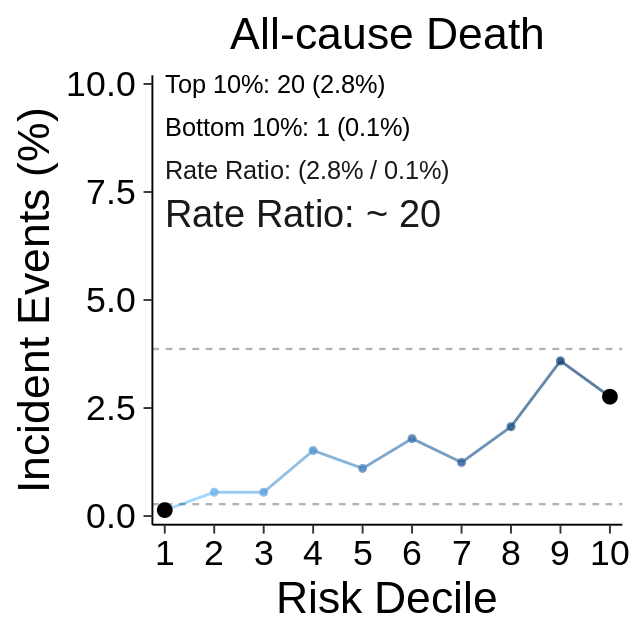

In [24]:
plot_width = 2; plot_height=2; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
#temp_rank = event_rest %>% filter(features=="Metabolomics") %>% arrange(desc(MET10PercvsREST))
#endpoint_order = (endpoint_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
temp = logh_T_agg %>% filter(endpoint=="OMOP_4306655") %>% ungroup() %>% arrange(endpoint) #%>% sample_n(10000)

fig2a = ggplot(temp, aes(x=as.numeric(as.character(logh_perc)), y=ratio*100, color=logh_perc)) + 
    labs(title="All-cause Death", x="Risk Decile", y="Incident Events (%)") +
    geom_line(alpha=0.7, size=0.3) +    
    geom_point(alpha=0.7, size=0.3) + 
    geom_point(data=temp %>% filter(logh_perc %in% c(1, 10)), alpha=1, size=1, color="black") + 
    geom_hline(aes(yintercept=0.038674033*100), alpha=0.3, linetype="22", size=0.25) + 
    geom_hline(aes(yintercept=0.002758621*100), alpha=0.3, linetype="22", size=0.25) + 
    coord_cartesian(ylim=c(0, 10))+
    geom_text(data=temp %>% filter(logh_perc==1), mapping=aes(label=glue("Bottom 10%: {n} ({round(ratio*100, 1)}%)")), color="black", size=2, x=1, y=9, hjust=0) + 
    geom_text(data=temp %>% filter(logh_perc==10), mapping=aes(label=glue("Top 10%: {n} ({round(ratio*100, 1)}%)")), color="black", size=2, x=1, y=10, hjust=0) + 
    geom_text(data=temp %>% pivot_wider(names_from=logh_perc, values_from=c("n", "ratio")), 
              mapping=aes(label=glue("Rate Ratio: ({round(ratio_10*100, 1)}% / {round(ratio_1*100, 1)}%)")), 
              color="black", size=2, x=1, y=8, hjust=0, alpha=0.9) + 
    geom_text(data=temp %>% pivot_wider(names_from=logh_perc, values_from=c("n", "ratio")), 
              mapping=aes(label=glue("Rate Ratio: ~ {round(ratio_10/ratio_1, 1)}")), 
              color="black", size=3, x=1, y=7, hjust=0, alpha=0.9) +
    scale_colour_gradient(low = "#7AC6FF", high = "#023768", space = "Lab", na.value = "grey50", guide = "colourbar", aesthetics = "colour")+
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(.02, .02)))+#, limits=c(0, NA))+
    scale_x_continuous(expand=expansion(add=c(0.25, 0.25)), breaks = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10))+
    theme(legend.position="none", plot.title = element_text(hjust = 0.5))
fig2a

## Real Figure with percentiles

In [25]:
logh_inc = pred_outcomes %>% filter(included==1) %>% group_by(endpoint) %>% mutate(logh_perc = ntile(logh, 10)) %>% ungroup() %>% as_tibble()

In [26]:
logh_T_agg = logh_inc %>% group_by(endpoint, logh_perc) %>% summarise(n=sum(event), ratio = mean(event)) %>% as_tibble()

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.


In [27]:
#logh_T_endpoint = logh_inc %>% group_by(endpoint) %>% summarise(n_all=sum(event), ratio_all = mean(event)) %>% as_tibble()

In [28]:
endpoint_order

[1] "phecode_202"    "phecode_401"    "phecode_404"    "phecode_404-1" 
 [5] "phecode_431-11" "phecode_424"    "phecode_468"    "phecode_474"   
 [9] "phecode_286-2"  "phecode_324-11" "phecode_328"    "phecode_164"   
[13] "phecode_726-1"  "phecode_371"    "phecode_103"    "phecode_101"   
[17] "phecode_102"    "phecode_583"    "phecode_542"    "OMOP_4306655"

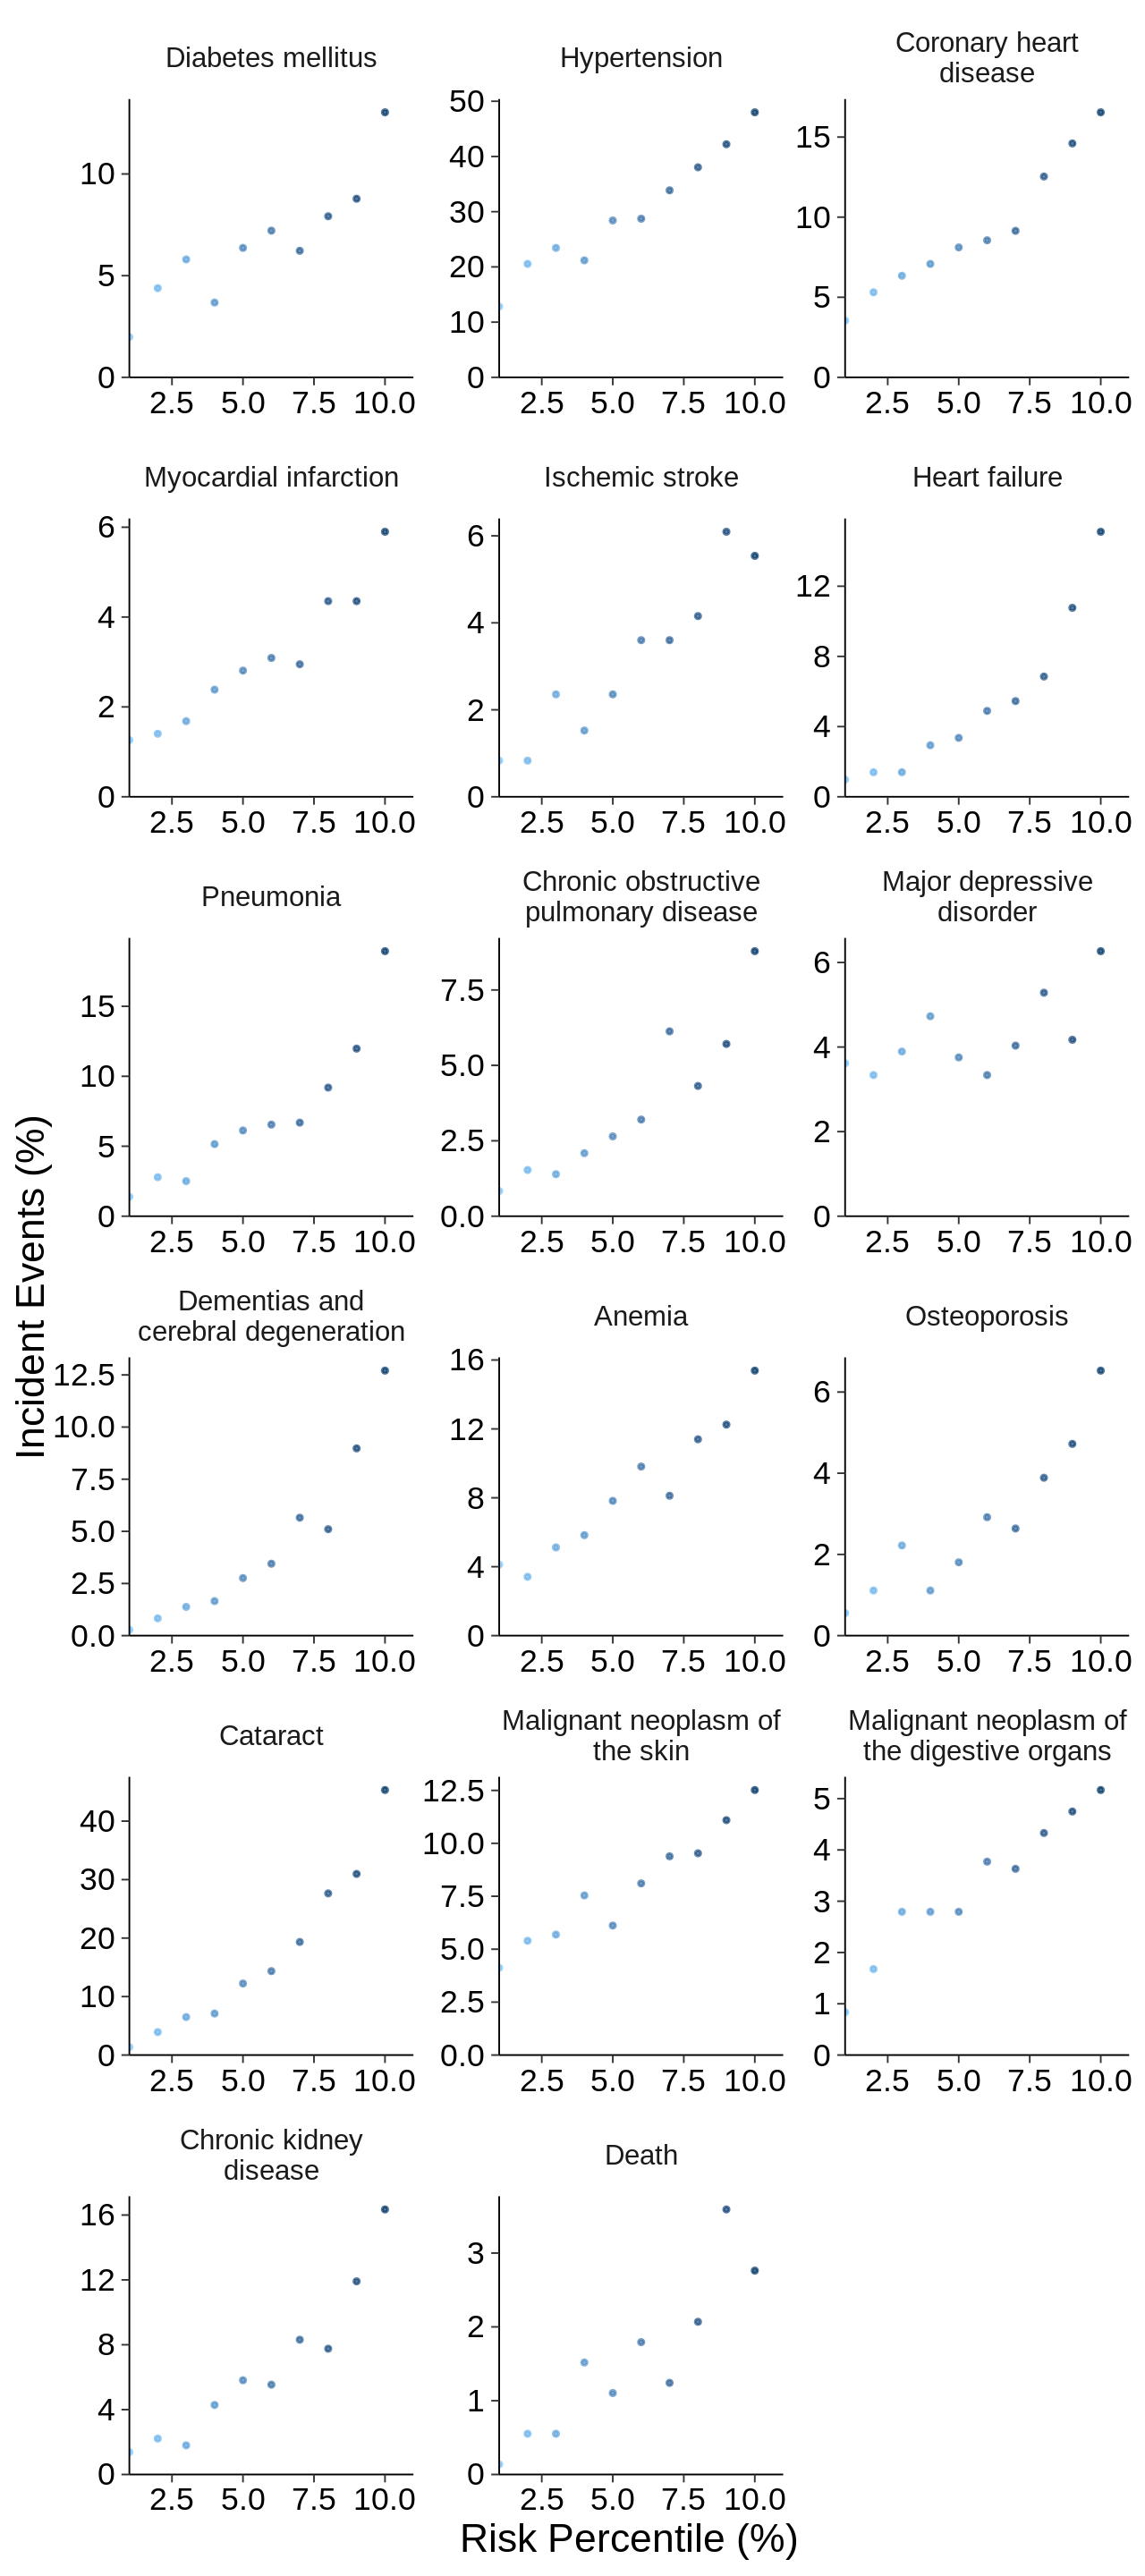

In [29]:
plot_width = 4; plot_height=9; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
#temp_rank = event_rest %>% filter(features=="Metabolomics") %>% arrange(desc(MET10PercvsREST))
#endpoint_order = (endpoint_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
temp = logh_T_agg %>% filter(endpoint %in% endpoint_selection) %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) #%>% sample_n(10000)

fig2a = ggplot(temp, aes(x=logh_perc, y=ratio*100, color=logh_perc)) + 
    labs(title=NULL, x="Risk Percentile (%)", y="Incident Events (%)") +
    geom_point(alpha=0.7, size=0.3) + 
    scale_colour_gradient(low = "#7AC6FF", high = "#023768", space = "Lab", na.value = "grey50", guide = "colourbar", aesthetics = "colour")+
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(0, .05)))+#, limits=c(0, NA))+
    scale_x_continuous(expand=expansion(add=c(0, 1)))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = as_labeller(endpoint_map, default=label_wrap_gen(22))), ncol=3) + theme(legend.position="none")
fig2a

In [30]:
temp %>% write_csv(glue("outputs/SupplFigure2b.csv"))

# Kaplan Mayer

In [31]:
logh_inc = pred_outcomes %>% filter(included==1) %>% group_by(endpoint) %>% mutate(logh_perc = ntile(logh, 100)) %>% ungroup() %>% as_tibble()

In [32]:
logh_ret = logh_inc %>% select(endpoint, eid, logh_perc, event, time) %>% group_by(endpoint) %>% 
    mutate(RET=case_when(logh_perc %in% 91:100 ~ "High", 
                        logh_perc %in% 45:55 ~ "Mid", 
                        logh_perc %in% 1:10 ~ "Low",
                        TRUE ~ "NA")
          ) %>% mutate(MET = fct_rev(factor(RET, levels=c("Low", "Mid", "High")))) %>% ungroup() %>% 
    filter(RET!="NA") #%>% select(eid, endpoint, logh, logh_group)

In [33]:
source("ggkm.R")

Warning message:
“The following aesthetics were dropped during statistical transformation: status
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: status
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: status
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: status
ℹ This can happen when ggplot fails to infer

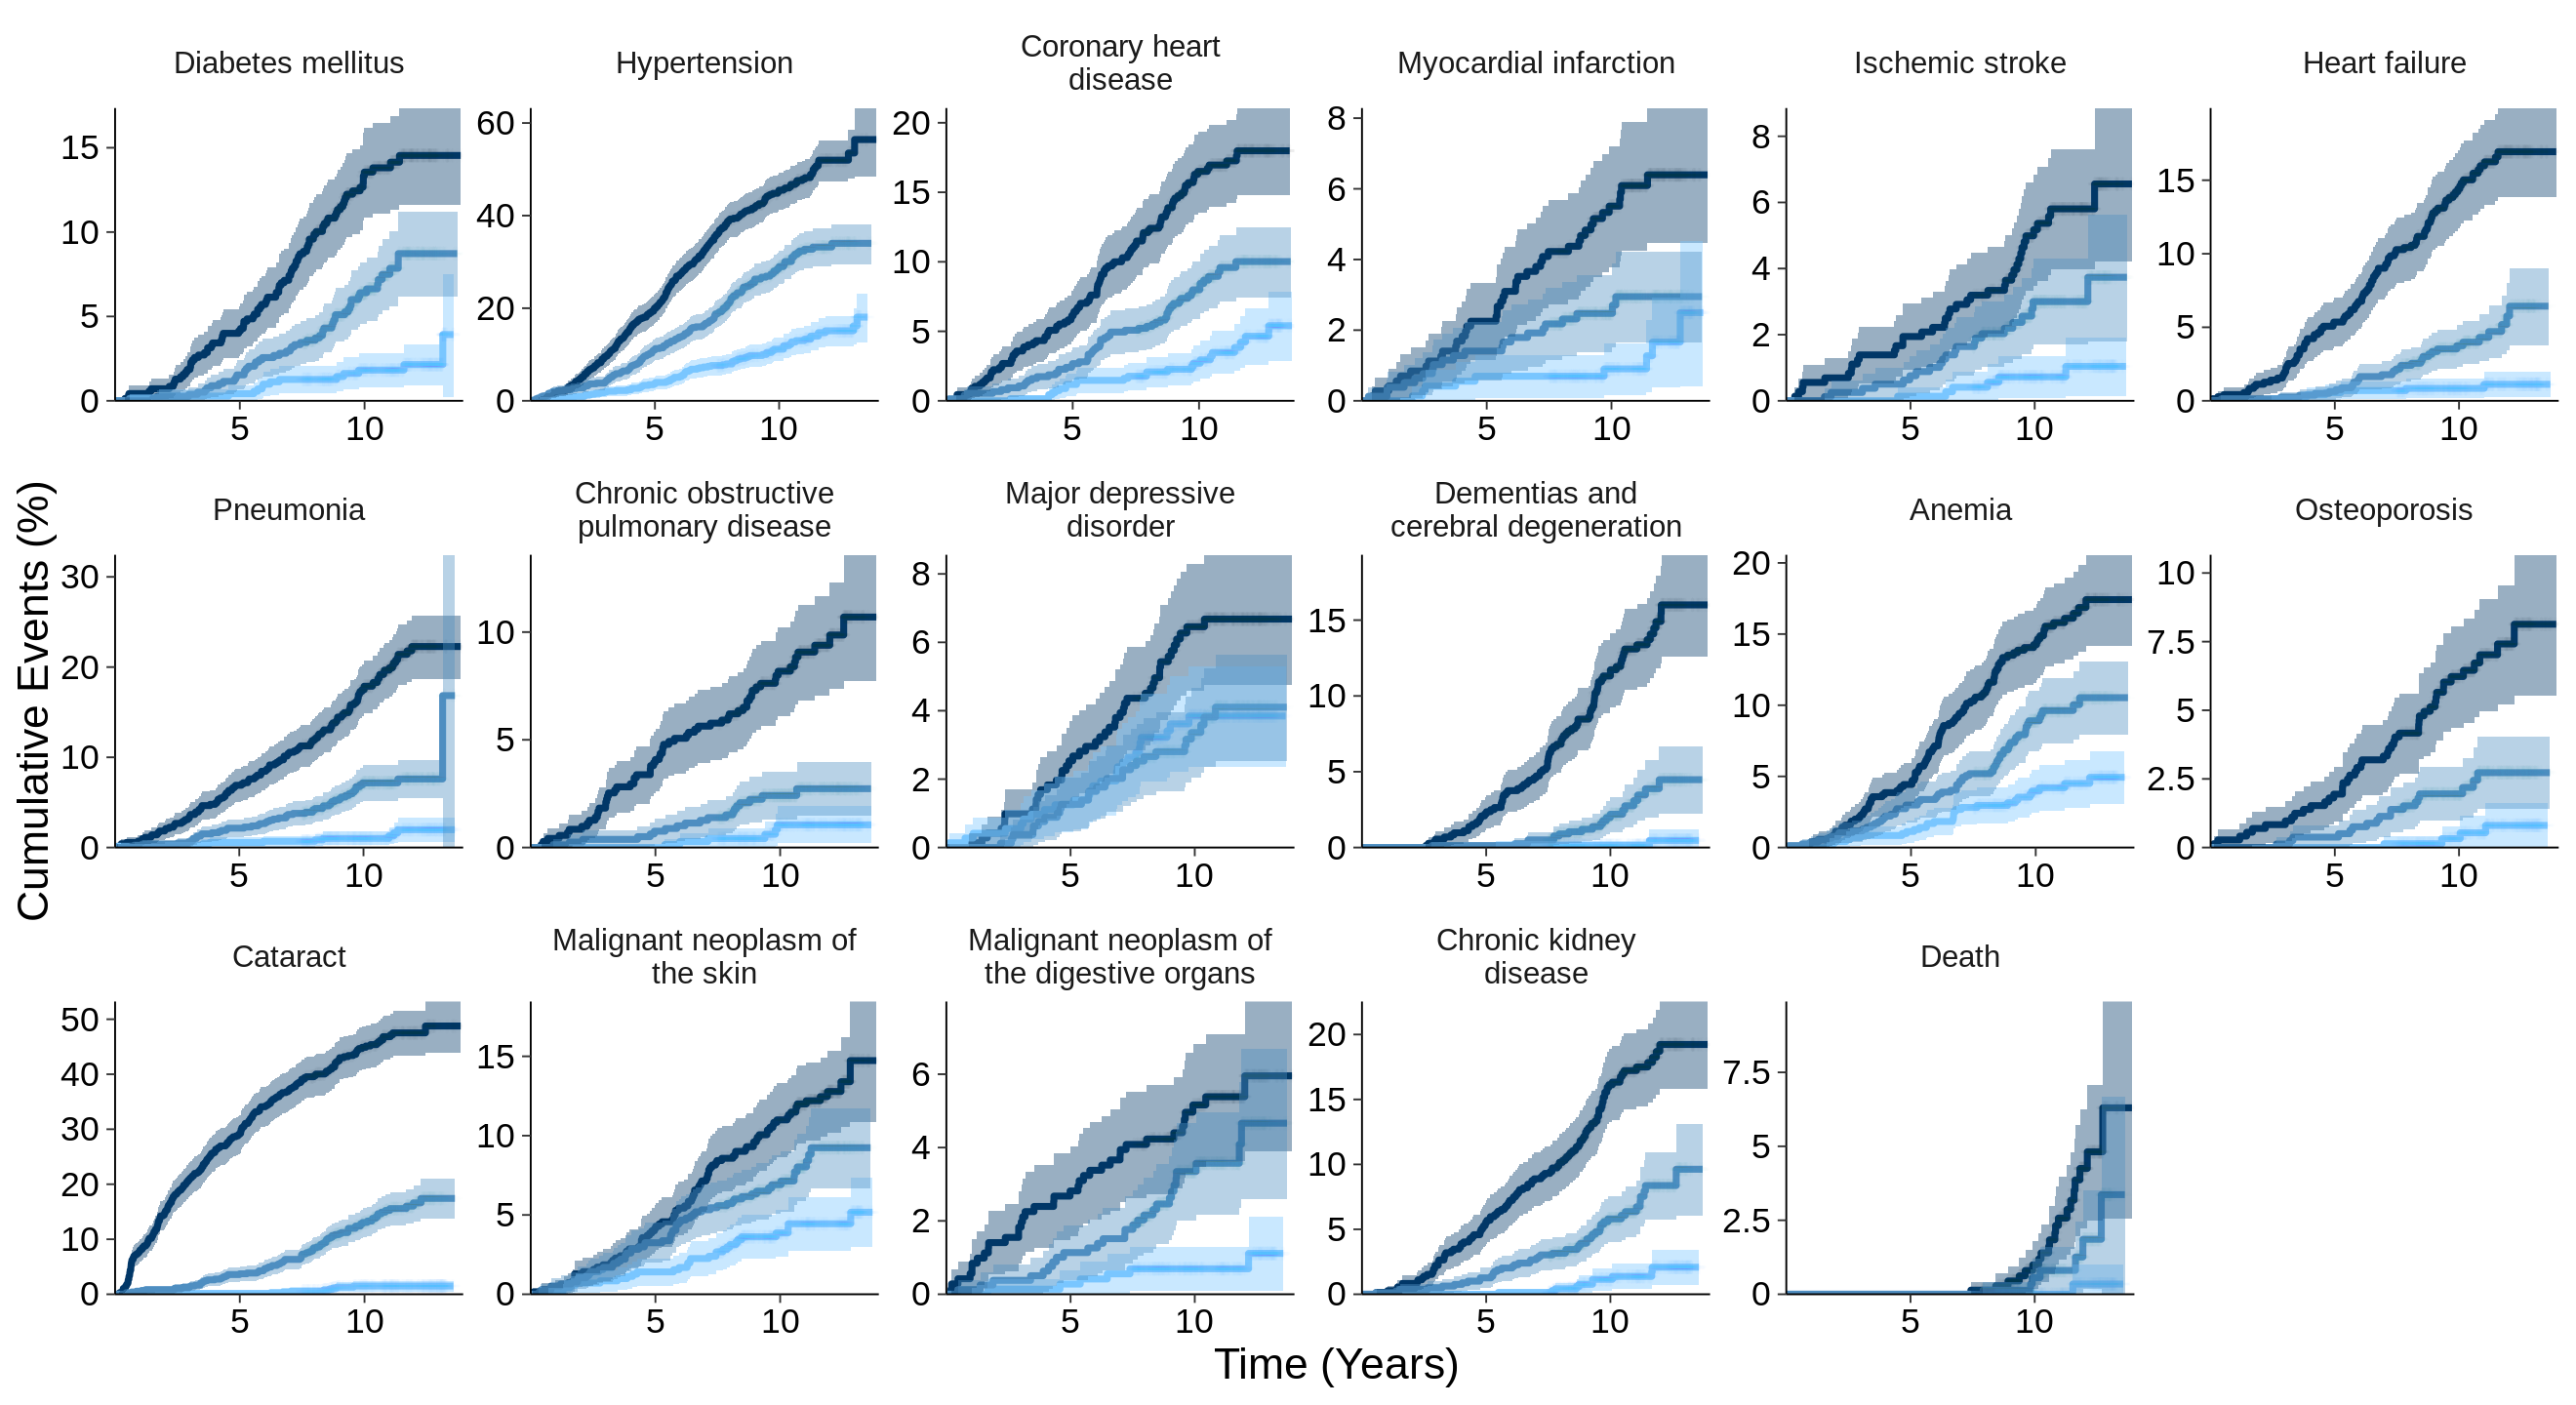

In [34]:
plot_width = 8.25; plot_height=4.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
met_map = c("High"="#023768", "Mid"="#4F8EC1", "Low"="#7AC6FF")

temp = logh_ret %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() 

fig2b = ggplot(temp, aes(time = time, status = event, fill=RET, color=RET, group=RET)) +
    geom_km(trans = "event") + 
    geom_kmticks(trans = "event", size=0.2, alpha=0.01) + 
    geom_kmband(trans = "event") + 
    labs(x="Time (Years)", y="Cumulative Events (%)")+
    scale_color_manual(values=met_map)+scale_fill_manual(values=met_map)+
    scale_y_continuous(labels = function(x) round(x*100, 1), expand=c(0, 0))+
    scale_x_continuous(expand=expansion(add=c(0, .1)), breaks=c(5, 10))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = as_labeller(endpoint_map, default=label_wrap_gen(22))), 
               ncol=6) + theme(legend.position="none")
fig2b

In [35]:
temp %>% write_csv(glue("outputs/SupplFigure2c.csv"))

In [38]:
plot_name = "SupplFigure2bc_EPIC_EventRates_Selected"
fig2b %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
fig2b %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

Warning message:
“The following aesthetics were dropped during statistical transformation: status
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: status
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: status
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: status
ℹ This can happen when ggplot fails to infer

Warning message:
“The following aesthetics were dropped during statistical transformation: status
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: status
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: status
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: status
ℹ This can happen when ggplot fails to infer

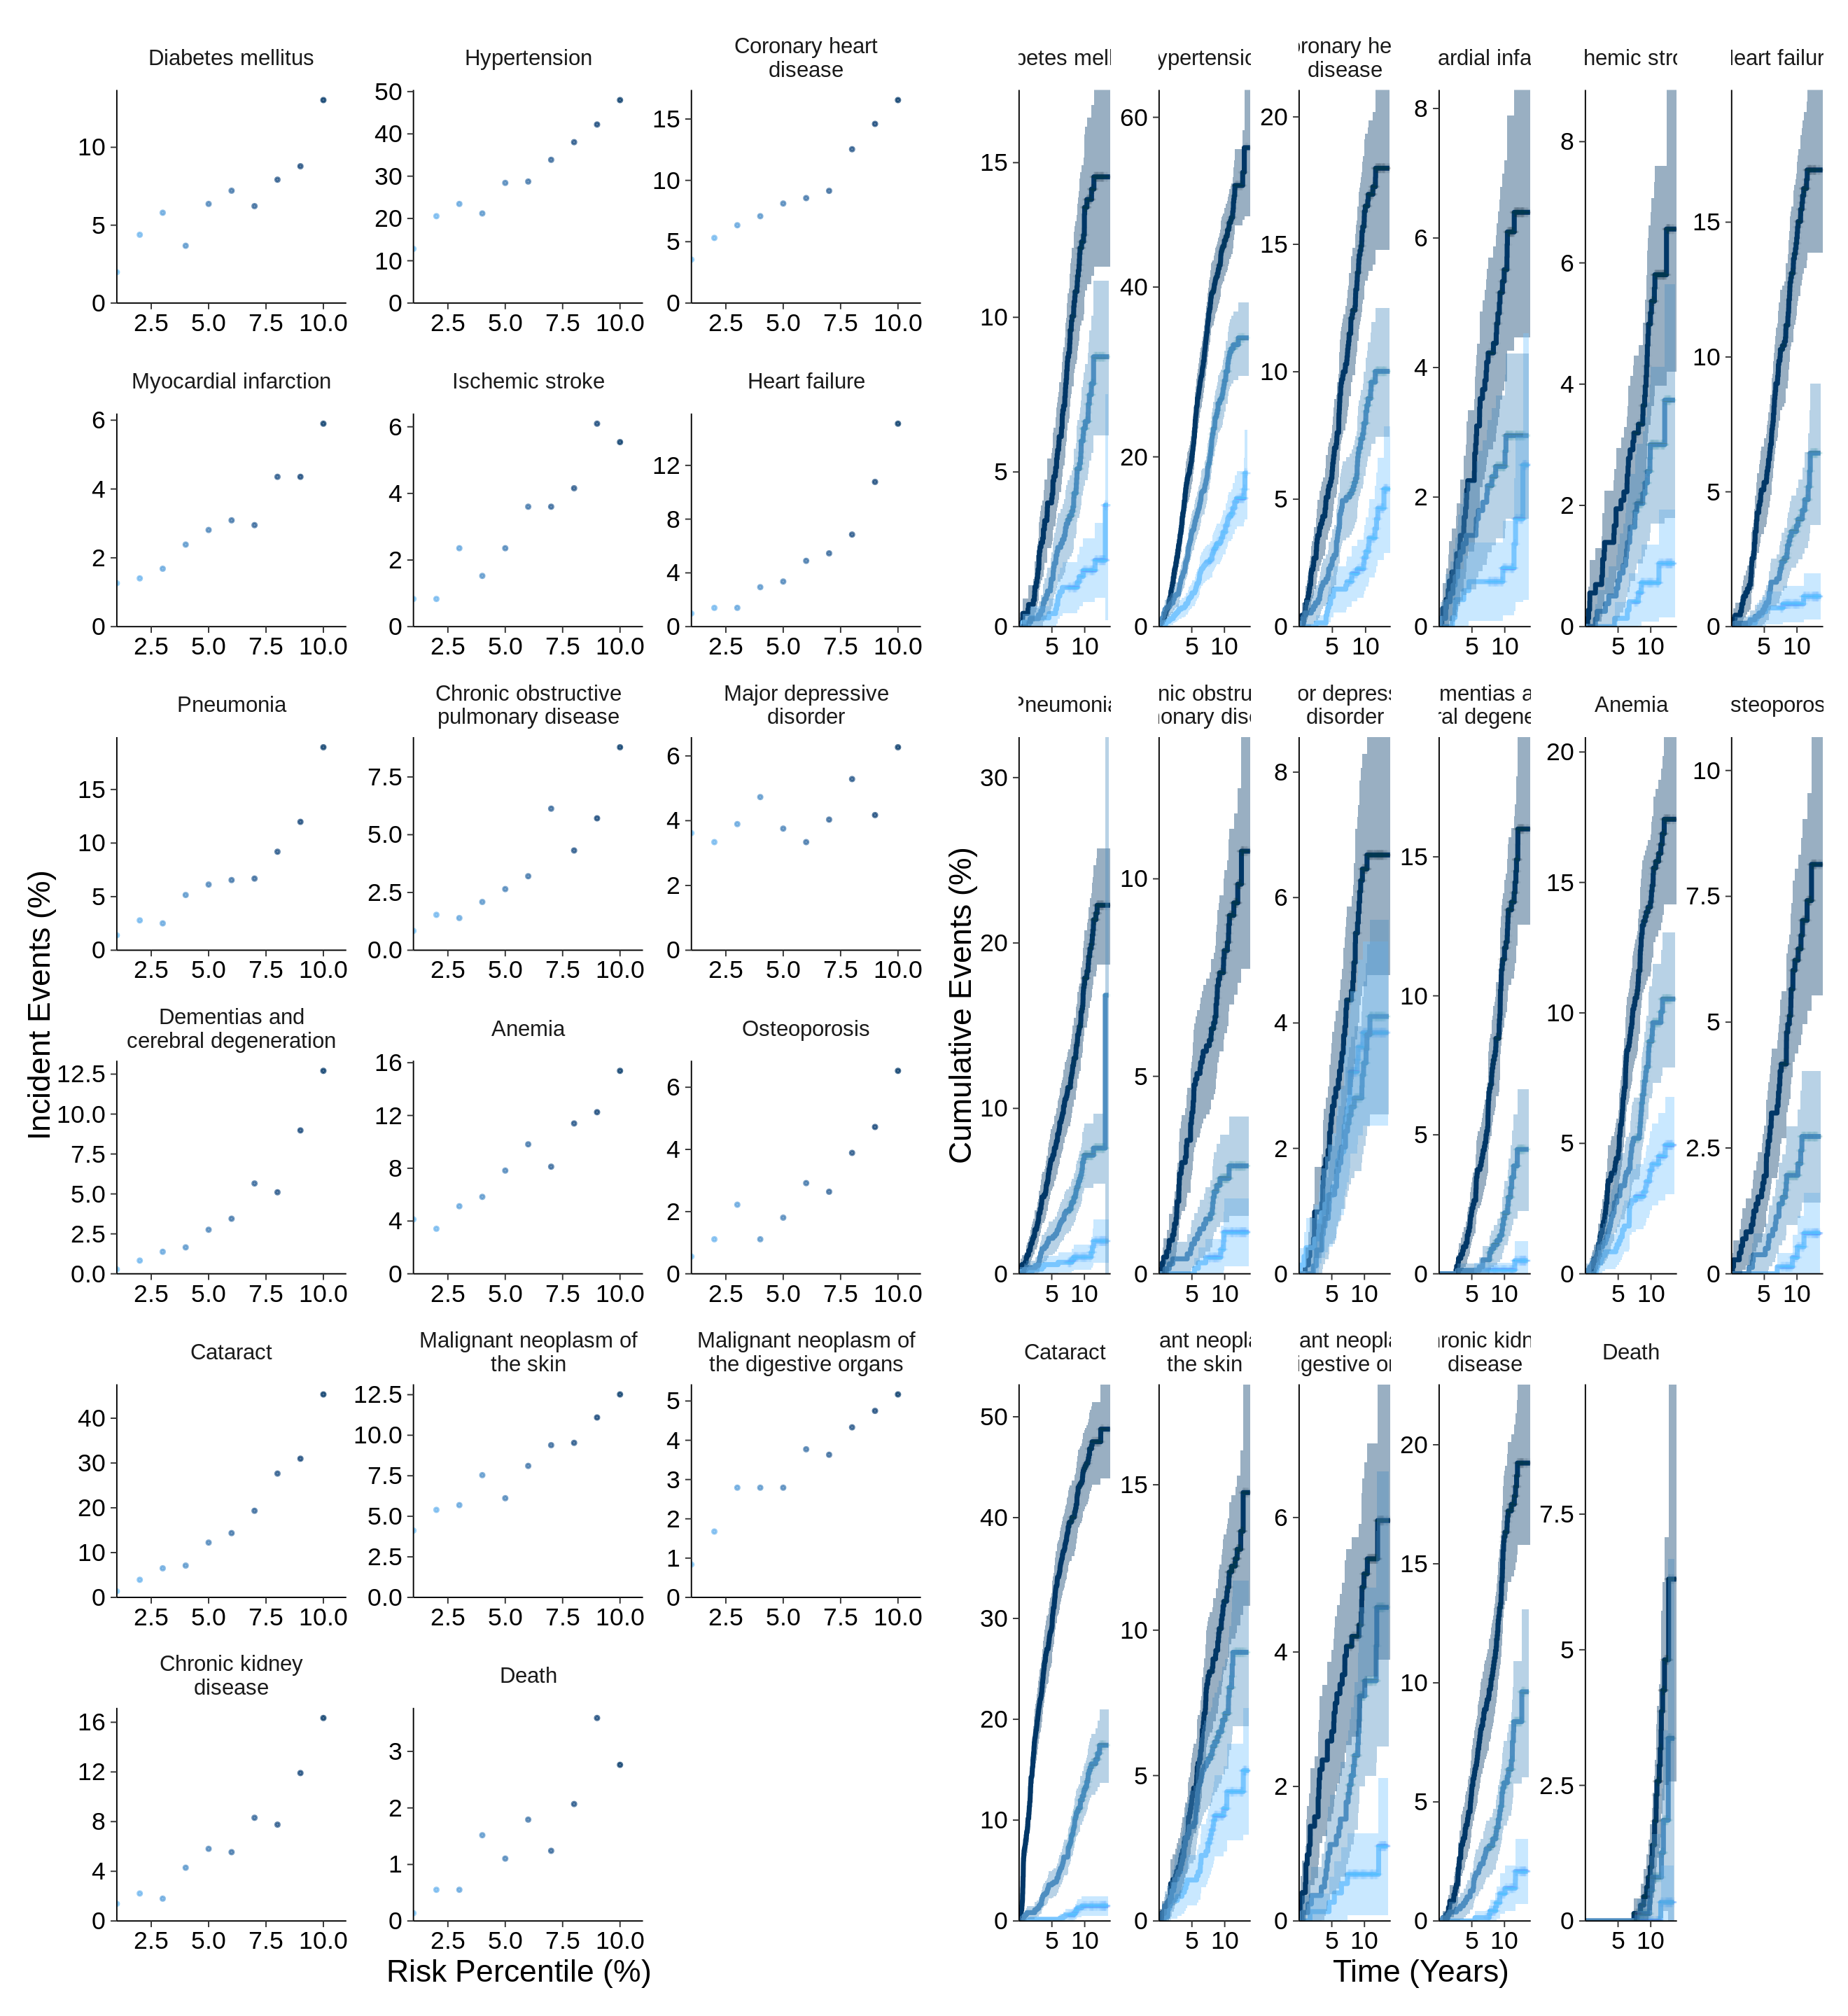

In [37]:
plot_width = 8.25; plot_height=9; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

fig2 = (fig2a | fig2b)
fig2